In [1]:
# Dataset download
!kaggle datasets download -p ../Datasets -d jsphyg/weather-dataset-rattle-package --unzip


  0%|          | 0.00/3.83M [00:00<?, ?B/s]
 26%|██▌       | 1.00M/3.83M [00:04<00:13, 215kB/s]
 26%|██▌       | 1.00M/3.83M [00:20<00:13, 215kB/s]
 52%|█████▏    | 2.00M/3.83M [00:24<00:25, 76.9kB/s]
 52%|█████▏    | 2.00M/3.83M [00:40<00:25, 76.9kB/s]
 78%|███████▊  | 3.00M/3.83M [00:59<00:19, 44.8kB/s]
 78%|███████▊  | 3.00M/3.83M [01:10<00:19, 44.8kB/s]
100%|██████████| 3.83M/3.83M [01:18<00:00, 45.1kB/s]
100%|██████████| 3.83M/3.83M [01:18<00:00, 51.0kB/s]


In [2]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Finding data files
import os

for dirname, _, filenames in os.walk('..\Datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

..\Datasets\heart_failure.csv
..\Datasets\UCI-Wisconsin-Breast-Cancer-Dataset.csv
..\Datasets\weatherAUS.csv


In [4]:
file = '..\Datasets\weatherAUS.csv'
df_aus_weather = pd.read_csv(file, header=0)

In [5]:
df_aus_weather

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


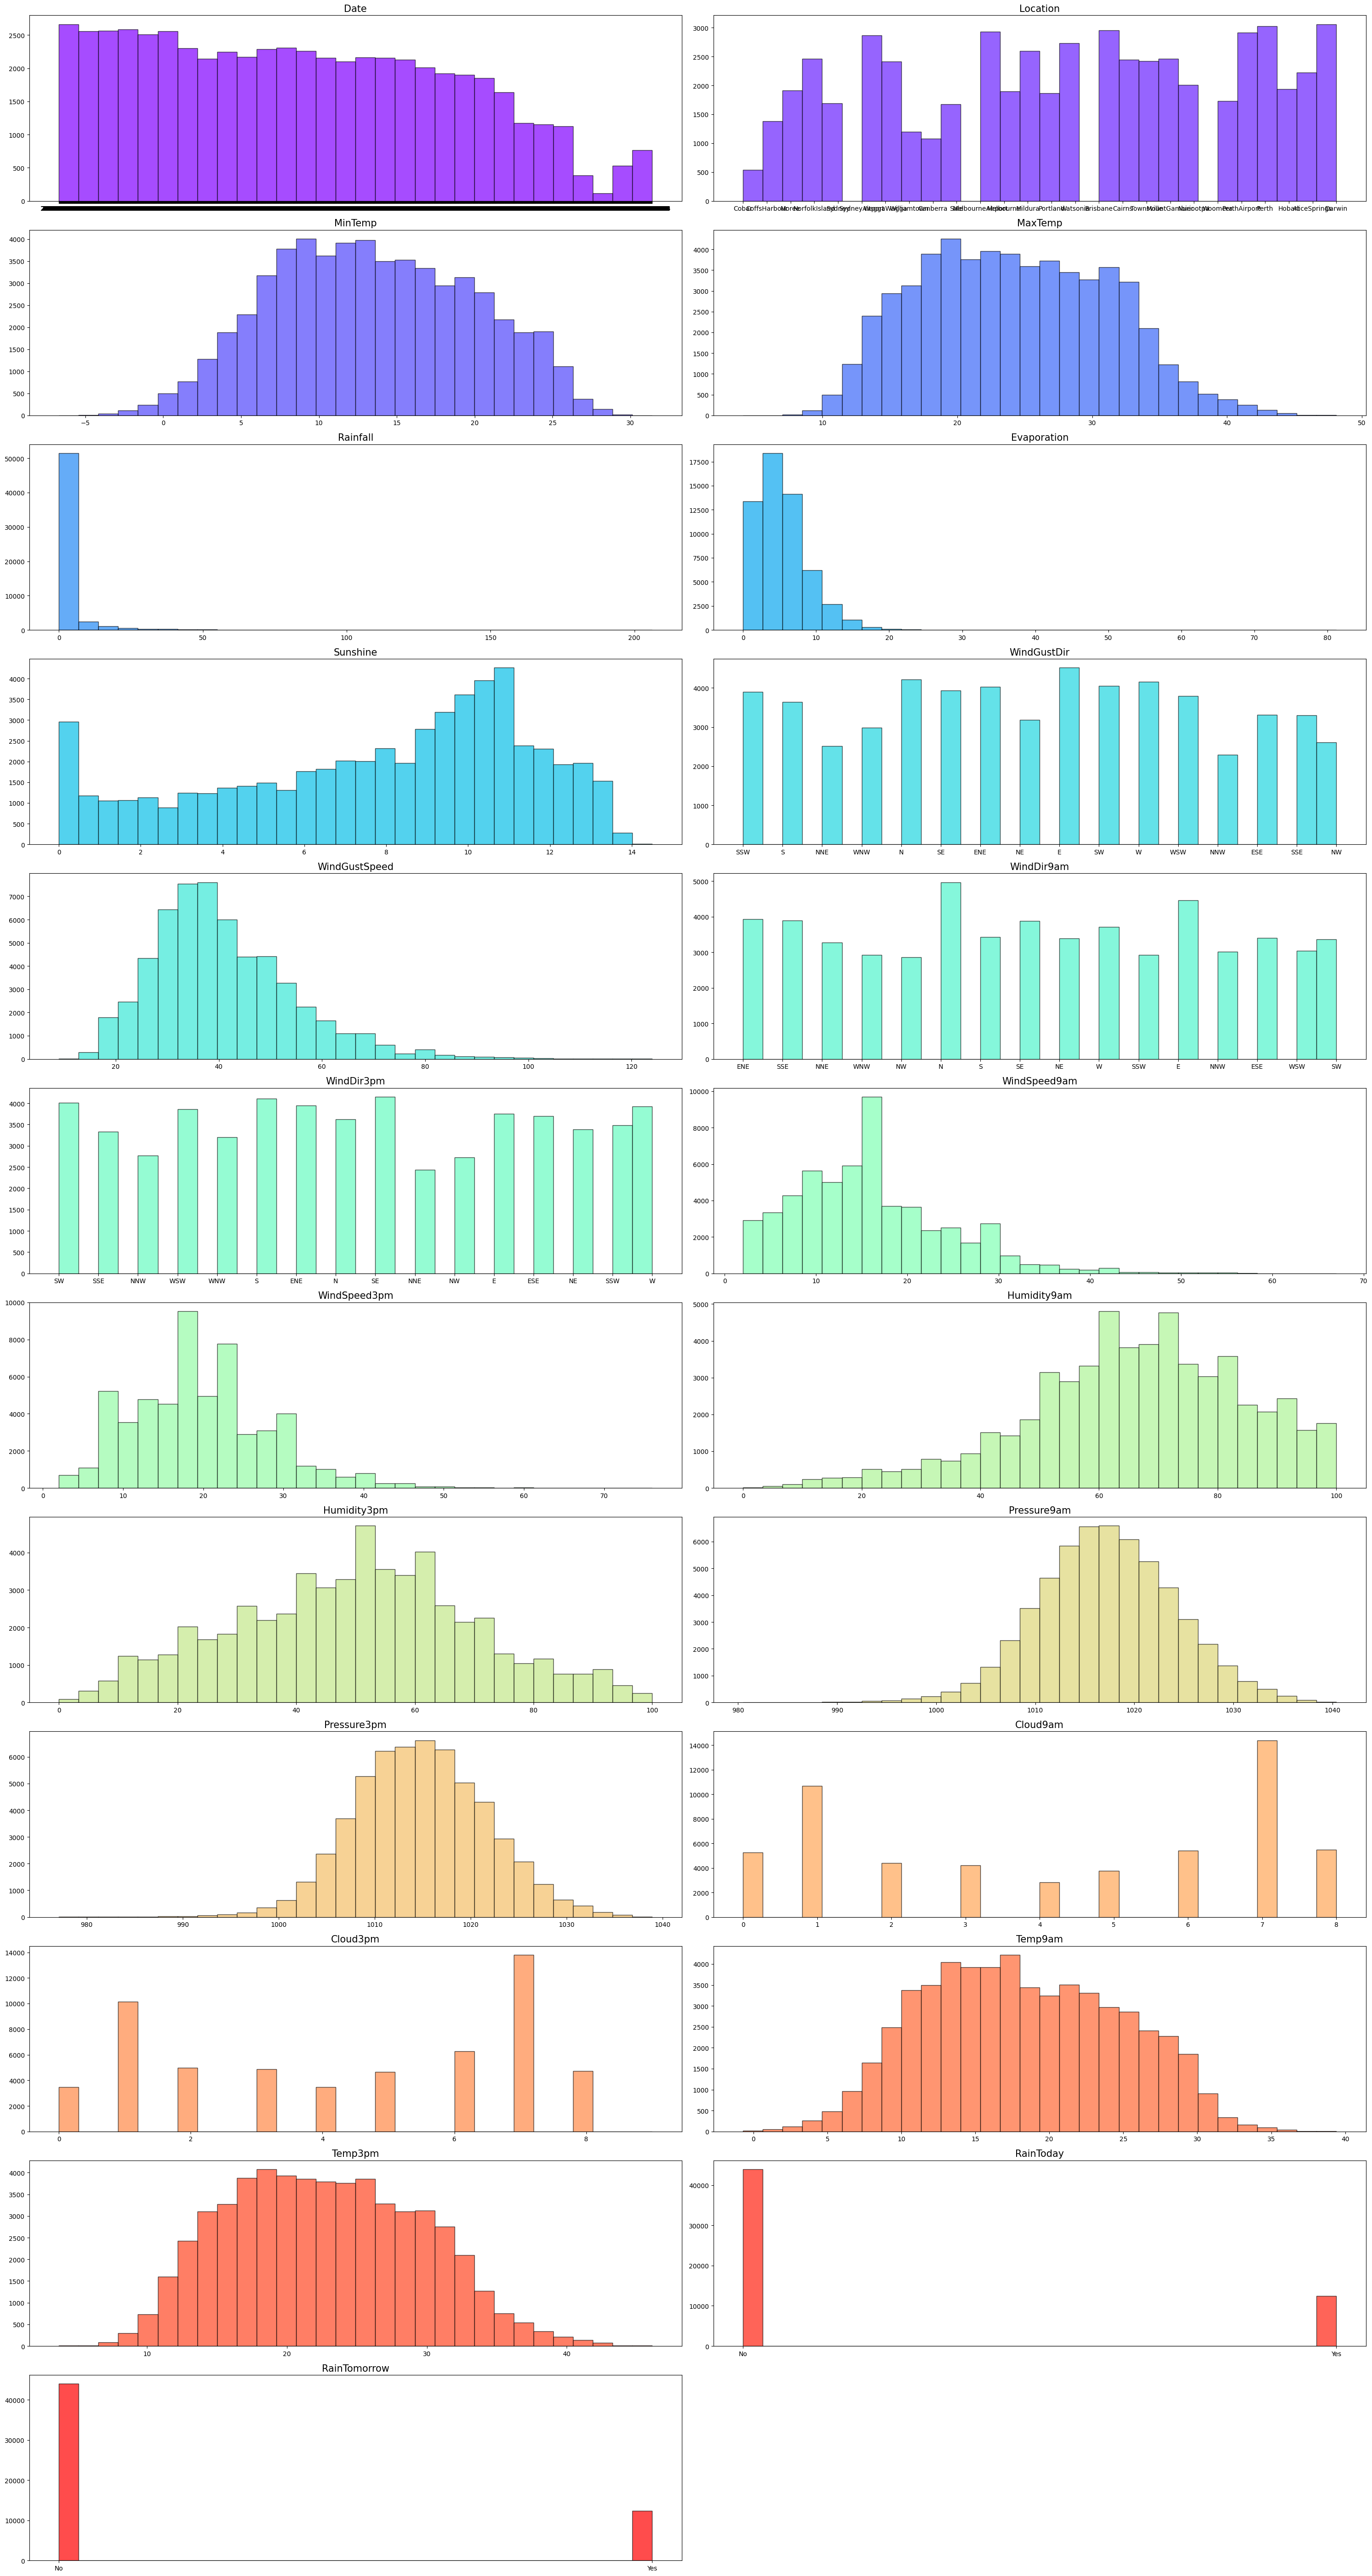

In [6]:
# Data Frequency Representation before Data Processing
# Drop rows with NaN values
df_cleaned = df_aus_weather.dropna()

plt.rcParams['figure.figsize'] = (30, 70)

# Create subplots
fig, axes = plt.subplots(nrows=15, ncols=2, sharex=False, sharey=False)
colors = plt.cm.rainbow(np.linspace(0, 1, len(df_cleaned.columns)))

# Plot histograms for each column
for col, ax, color in zip(df_cleaned.columns, axes.flatten(), colors):
    ax.hist(df_cleaned[col], bins=30, alpha=0.7, edgecolor='black', color=color)
    ax.set_title(col, fontsize=15)
    ax.set_xlim(auto=True)

# Remove any extra subplots
for i in range(len(df_cleaned.columns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

# Adjust layout and display plot
plt.tight_layout()
plt.show()

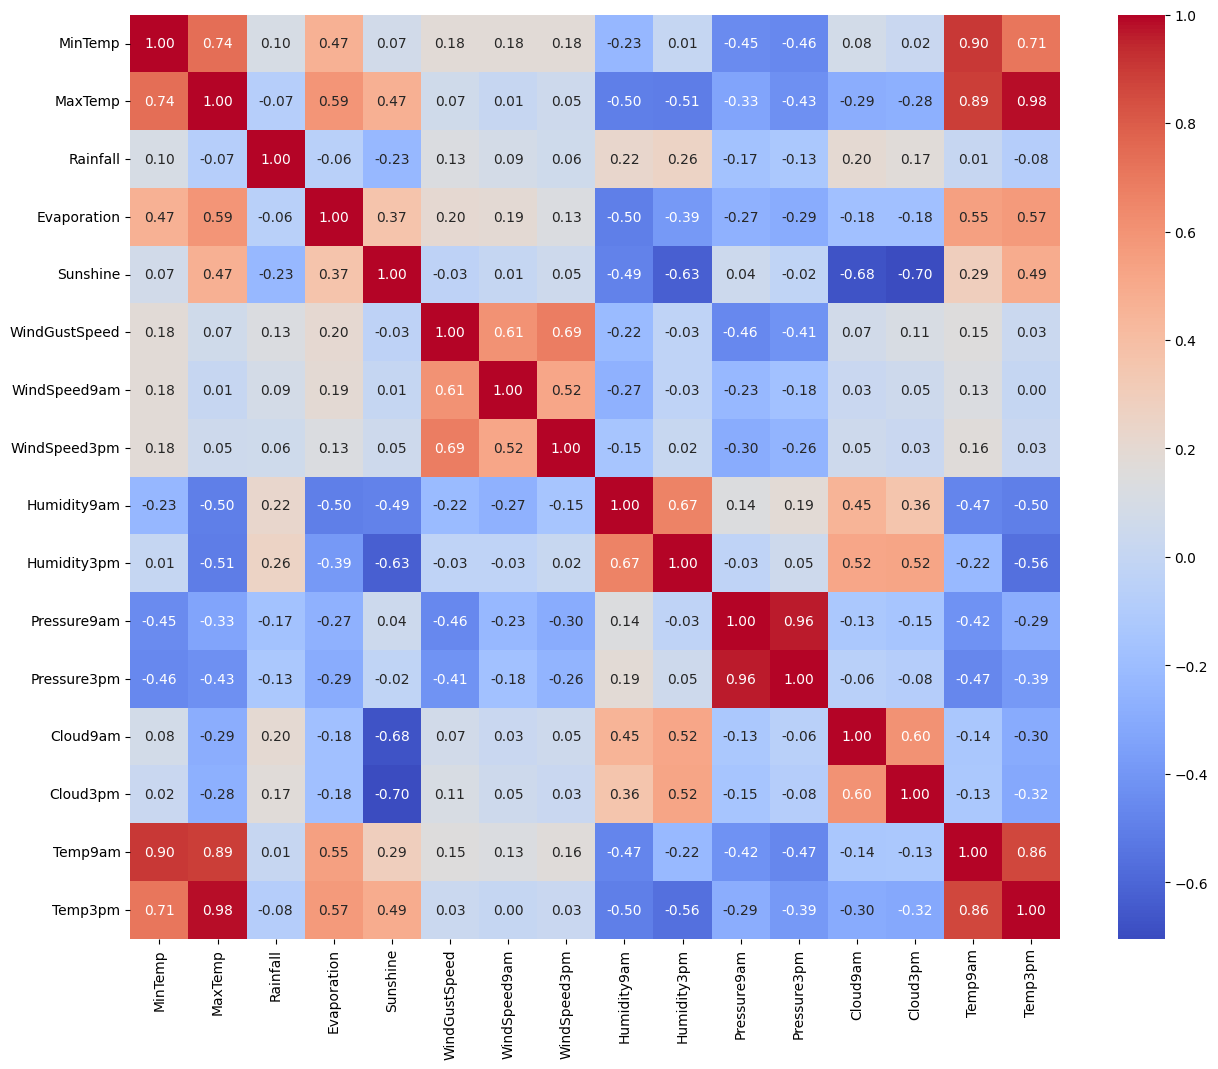

In [7]:
# Correlation Matrix
corr_matrix_pre_clean = df_aus_weather.corr(numeric_only=True)
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix_pre_clean, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [8]:
df_aus_weather.isna().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

In [9]:
# Data Cleaning and Processing
# MinTemp, MaxTemp, Temp9am, Temp3pm, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Pressure9am, Pressure3pm vary smoothly so we interpolate
columns_to_interpolate = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

df_aus_weather[columns_to_interpolate] = df_aus_weather[columns_to_interpolate].interpolate(method='linear')

In [10]:
# Categorical value filling using Most Frequent Value
# Replace missing values with the mode
df_aus_weather['WindGustDir'].fillna(df_aus_weather['WindGustDir'].mode()[0], inplace=True)
df_aus_weather['WindDir9am'].fillna(df_aus_weather['WindDir9am'].mode()[0], inplace=True)
df_aus_weather['WindDir3pm'].fillna(df_aus_weather['WindDir3pm'].mode()[0], inplace=True)

In [11]:
# Forward Filling weather data
df_aus_weather['Rainfall'].fillna(method='ffill', inplace=True)
df_aus_weather['Evaporation'].fillna(method='ffill', inplace=True)
df_aus_weather['Sunshine'].fillna(method='ffill', inplace=True)

# Backward Filling weather data
df_aus_weather['Rainfall'].fillna(method='bfill', inplace=True)
df_aus_weather['Evaporation'].fillna(method='bfill', inplace=True)
df_aus_weather['Sunshine'].fillna(method='bfill', inplace=True)

In [12]:
# Forward Filling humidity and cloud cover data
df_aus_weather['Humidity9am'].fillna(method='ffill', inplace=True)
df_aus_weather['Humidity3pm'].fillna(method='ffill', inplace=True)
df_aus_weather['Cloud9am'].fillna(method='ffill', inplace=True)
df_aus_weather['Cloud3pm'].fillna(method='ffill', inplace=True)

# Backward Filling humidity and cloud cover data
df_aus_weather['Humidity9am'].fillna(method='bfill', inplace=True)
df_aus_weather['Humidity3pm'].fillna(method='bfill', inplace=True)
df_aus_weather['Cloud9am'].fillna(method='bfill', inplace=True)
df_aus_weather['Cloud3pm'].fillna(method='bfill', inplace=True)

In [13]:
df_aus_weather.shape

(145460, 23)

In [14]:
df_aus_weather.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday        3261
RainTomorrow     3267
dtype: int64

In [15]:
# Dropping NaN data for RainToday and RainTomorrow fields
df_aus_weather.dropna(inplace=True)

In [16]:
df_aus_weather.shape

(140787, 23)

In [17]:
df_aus_weather.isna().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

In [18]:
# Cleaned data
df_aus_weather

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,12.0,12.3,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,2.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,12.0,12.3,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,8.0,2.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,12.0,12.3,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,12.0,12.3,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,8.0,2.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,12.0,12.3,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,10.0,10.7,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,8.0,7.0,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,10.0,10.7,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,8.0,7.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,10.0,10.7,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,8.0,7.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,10.0,10.7,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,8.0,7.0,12.5,26.1,No,No


In [19]:
# Changing Categorical Cardinal Directions to Numerical Values maintaining Vectors
# Rough conversion as exact angles weren't available
direction_map = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

# Convert wind directions to degrees
df_aus_weather['WindGustDir_deg'] = df_aus_weather['WindGustDir'].map(direction_map)
df_aus_weather['WindDir9am_deg'] = df_aus_weather['WindDir9am'].map(direction_map)
df_aus_weather['WindDir3pm_deg'] = df_aus_weather['WindDir3pm'].map(direction_map)

# Compute NS and EW components in degrees
df_aus_weather['WindGust_NS'] = np.sin(df_aus_weather['WindGustDir_deg'] * np.pi / 180) * df_aus_weather['WindGustSpeed']
df_aus_weather['WindGust_EW'] = np.cos(df_aus_weather['WindGustDir_deg'] * np.pi / 180) * df_aus_weather['WindGustSpeed']
df_aus_weather['WindDir9am_NS'] = np.sin(df_aus_weather['WindDir9am_deg'] * np.pi / 180) * df_aus_weather['WindSpeed9am']
df_aus_weather['WindDir9am_EW'] = np.cos(df_aus_weather['WindDir9am_deg'] * np.pi / 180) * df_aus_weather['WindSpeed9am']
df_aus_weather['WindDir3pm_NS'] = np.sin(df_aus_weather['WindDir3pm_deg'] * np.pi / 180) * df_aus_weather['WindSpeed3pm']
df_aus_weather['WindDir3pm_EW'] = np.cos(df_aus_weather['WindDir3pm_deg'] * np.pi / 180) * df_aus_weather['WindSpeed3pm']

In [20]:
# Processed data
df_aus_weather

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,RainTomorrow,WindGustDir_deg,WindDir9am_deg,WindDir3pm_deg,WindGust_NS,WindGust_EW,WindDir9am_NS,WindDir9am_EW,WindDir3pm_NS,WindDir3pm_EW
0,2008-12-01,Albury,13.4,22.9,0.6,12.0,12.3,W,44.0,W,...,No,270.0,270.0,292.5,-44.000000,-8.082669e-15,-20.000000,-3.673940e-15,-22.173109,9.184402e+00
1,2008-12-02,Albury,7.4,25.1,0.0,12.0,12.3,WNW,44.0,NNW,...,No,292.5,337.5,247.5,-40.650699,1.683807e+01,-1.530734,3.695518e+00,-20.325350,-8.419036e+00
2,2008-12-03,Albury,12.9,25.7,0.0,12.0,12.3,WSW,46.0,W,...,No,247.5,270.0,247.5,-42.498458,-1.760344e+01,-19.000000,-3.490243e-15,-24.020868,-9.949769e+00
3,2008-12-04,Albury,9.2,28.0,0.0,12.0,12.3,NE,24.0,SE,...,No,45.0,135.0,90.0,16.970563,1.697056e+01,7.778175,-7.778175e+00,9.000000,5.510911e-16
4,2008-12-05,Albury,17.5,32.3,1.0,12.0,12.3,W,41.0,ENE,...,No,270.0,67.5,315.0,-41.000000,-7.531578e-15,6.467157,2.678784e+00,-14.142136,1.414214e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,10.0,10.7,E,31.0,ESE,...,No,90.0,112.5,90.0,31.000000,1.898203e-15,13.858193,-5.740251e+00,13.000000,7.960204e-16
145455,2017-06-21,Uluru,2.8,23.4,0.0,10.0,10.7,E,31.0,SE,...,No,90.0,135.0,67.5,31.000000,1.898203e-15,9.192388,-9.192388e+00,10.162675,4.209518e+00
145456,2017-06-22,Uluru,3.6,25.3,0.0,10.0,10.7,NNW,22.0,SE,...,No,337.5,135.0,0.0,-8.419036,2.032535e+01,9.192388,-9.192388e+00,0.000000,9.000000e+00
145457,2017-06-23,Uluru,5.4,26.9,0.0,10.0,10.7,N,37.0,SE,...,No,0.0,135.0,292.5,0.000000,3.700000e+01,6.363961,-6.363961e+00,-8.314916,3.444151e+00


In [21]:
df_aus_weather.isna().any()

Date               False
Location           False
MinTemp            False
MaxTemp            False
Rainfall           False
Evaporation        False
Sunshine           False
WindGustDir        False
WindGustSpeed      False
WindDir9am         False
WindDir3pm         False
WindSpeed9am       False
WindSpeed3pm       False
Humidity9am        False
Humidity3pm        False
Pressure9am        False
Pressure3pm        False
Cloud9am           False
Cloud3pm           False
Temp9am            False
Temp3pm            False
RainToday          False
RainTomorrow       False
WindGustDir_deg    False
WindDir9am_deg     False
WindDir3pm_deg     False
WindGust_NS        False
WindGust_EW        False
WindDir9am_NS      False
WindDir9am_EW      False
WindDir3pm_NS      False
WindDir3pm_EW      False
dtype: bool

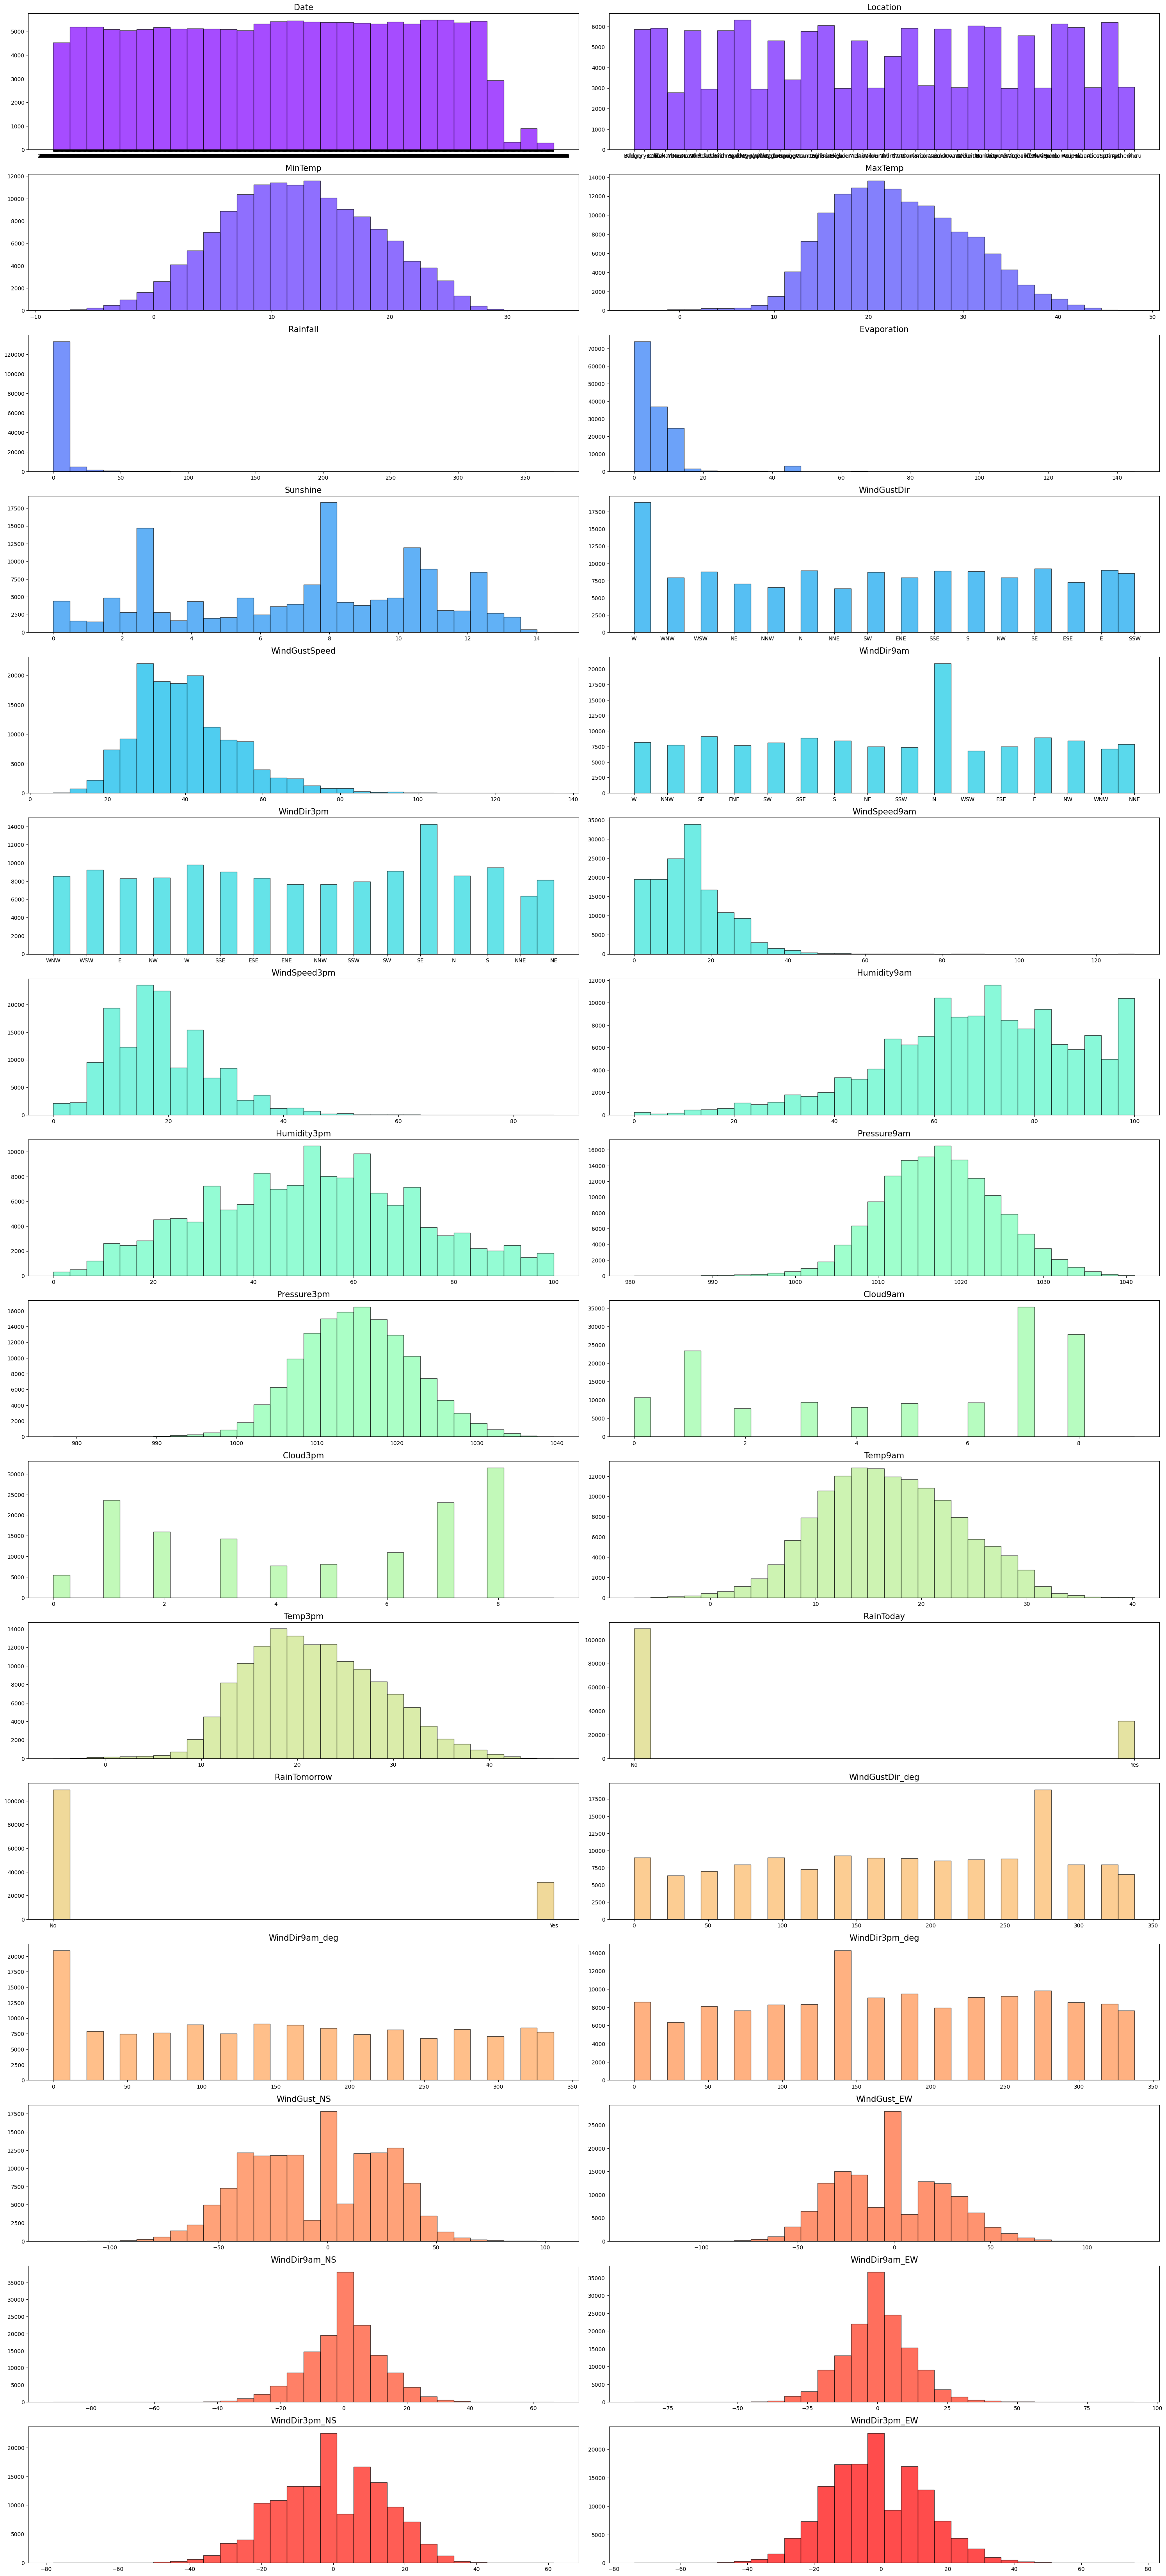

In [22]:
# Data Frequency Representation
plt.rcParams['figure.figsize']=(30, 70)

fig, axes = plt.subplots(nrows=17, ncols=2, sharex=False, sharey=False)
colors = plt.cm.rainbow(np.linspace(0, 1, len(df_aus_weather.columns)))

for col, ax, color in zip(df_aus_weather.columns, axes.flatten(), colors):
    ax.hist(df_aus_weather[col], bins=30, alpha=0.7, edgecolor='black', color=color)
    ax.set_title(col, fontsize=15)
    ax.set_xlim(auto=True)

for i in range(len(df_aus_weather.columns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

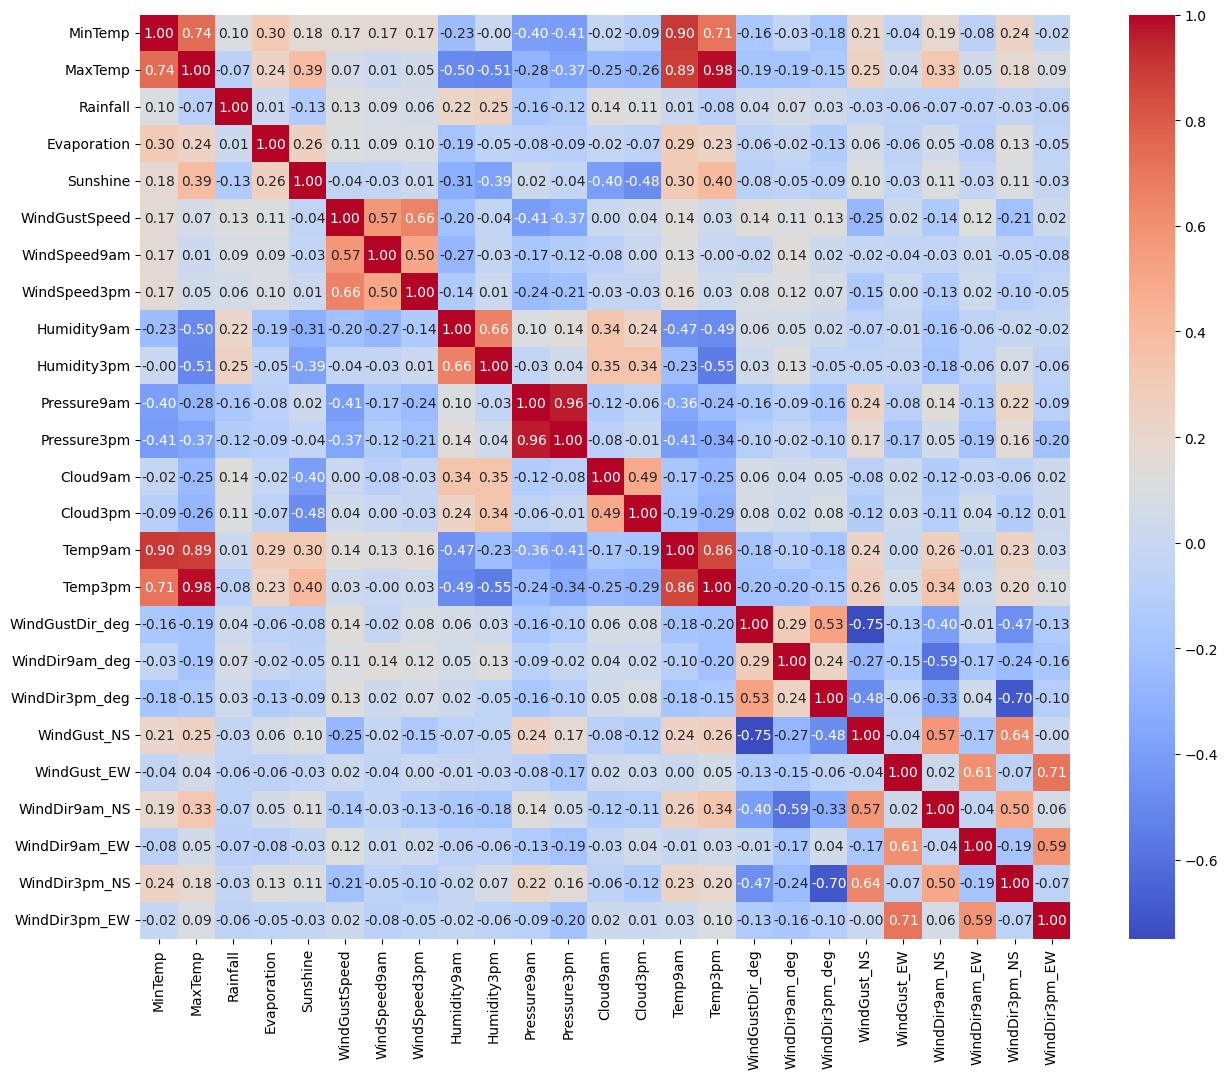

In [23]:
# Correlation Matrix
corr_matrix = df_aus_weather.corr(numeric_only=True)
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [24]:
# Location wise correlation matrix
"""locations = df_aus_weather['Location'].unique()

for location in locations:
    location_df = df_aus_weather[df_aus_weather['Location'] == location]

    corr_matrix = location_df.corr(numeric_only=True)

    plt.figure(figsize=(15, 12))
    plt.title(f'Correlation Matrix - {location}')
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.show()"""

'locations = df_aus_weather[\'Location\'].unique()\n\nfor location in locations:\n    location_df = df_aus_weather[df_aus_weather[\'Location\'] == location]\n\n    corr_matrix = location_df.corr(numeric_only=True)\n\n    plt.figure(figsize=(15, 12))\n    plt.title(f\'Correlation Matrix - {location}\')\n    sns.heatmap(corr_matrix, annot=True, cmap=\'coolwarm\', fmt=".2f")\n    plt.show()'

In [25]:
df_aus_weather['RainToday']

0         No
1         No
2         No
3         No
4         No
          ..
145454    No
145455    No
145456    No
145457    No
145458    No
Name: RainToday, Length: 140787, dtype: object

In [26]:
# Categorical to Numerical Mapping
rain_categorical_mapping = {
    'No': 0, 
    'Yes': 1
}

df_aus_weather['RainToday'].replace(rain_categorical_mapping, inplace=True)

In [27]:
df_aus_weather['RainToday']

0         0
1         0
2         0
3         0
4         0
         ..
145454    0
145455    0
145456    0
145457    0
145458    0
Name: RainToday, Length: 140787, dtype: int64

In [28]:
# X, y split
X = df_aus_weather.drop(columns=['RainTomorrow'], axis='columns')
y = df_aus_weather['RainTomorrow']

In [29]:
X.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'WindGustDir_deg', 'WindDir9am_deg',
       'WindDir3pm_deg', 'WindGust_NS', 'WindGust_EW', 'WindDir9am_NS',
       'WindDir9am_EW', 'WindDir3pm_NS', 'WindDir3pm_EW'],
      dtype='object')

In [30]:
# Removing redundant values
X.drop(columns=[
    'Date',
    'Location',
    'WindGustSpeed', 
    'WindSpeed9am', 
    'WindSpeed3pm',
    'WindGustDir',
    'WindDir9am',
    'WindDir3pm',
    'WindGustDir_deg',
    'WindDir9am_deg',
    'WindDir3pm_deg',
],
inplace=True)

In [31]:
y

0         No
1         No
2         No
3         No
4         No
          ..
145454    No
145455    No
145456    No
145457    No
145458    No
Name: RainTomorrow, Length: 140787, dtype: object

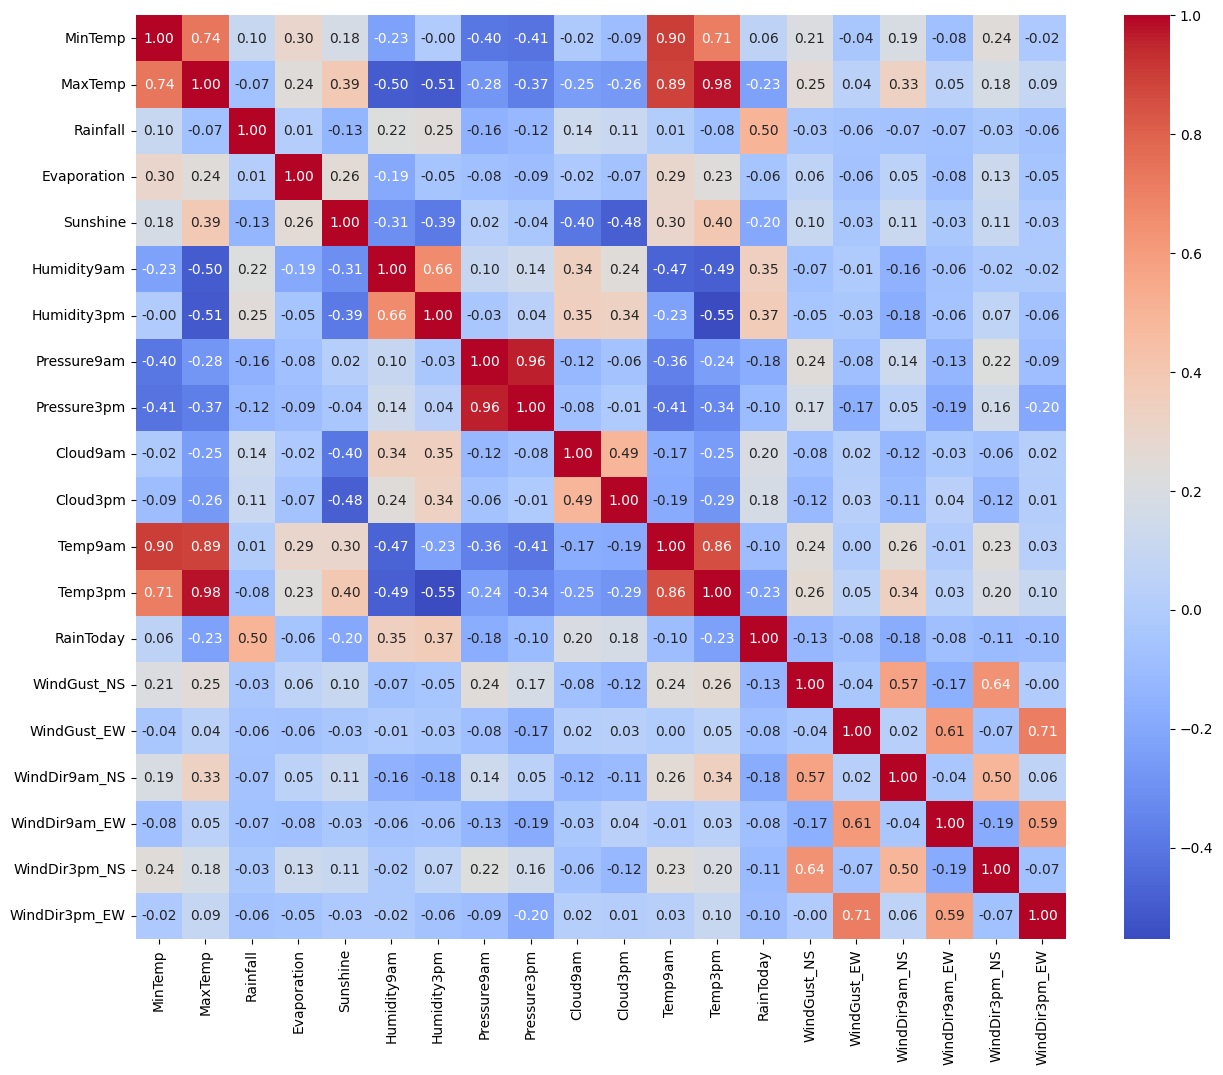

In [32]:
# New Correlation Matrix
corr_matrix = X.corr(numeric_only=True)
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
X_train.shape, X_test.shape

((112629, 20), (28158, 20))

In [35]:
y_train.shape, y_test.shape

((112629,), (28158,))

In [36]:
cols = X_train.columns

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [37]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,WindGust_NS,WindGust_EW,WindDir9am_NS,WindDir9am_EW,WindDir3pm_NS,WindDir3pm_EW
0,0.127332,-0.074356,-0.276533,0.913657,0.226335,-0.149708,-0.112556,0.756592,0.446457,-0.267821,-0.940739,0.190850,0.082837,-0.535515,0.458711,0.843796,-0.575507,-0.537254,-0.297971,0.922649
1,1.938206,1.414010,-0.276533,-0.212543,1.024768,-0.045734,0.269875,-0.748605,-1.012952,-0.267821,-0.940739,1.894515,1.509021,-0.535515,-0.694464,0.984177,0.799984,0.746788,0.037983,1.613573
2,0.751771,-0.102438,-0.252960,5.287501,0.033610,-0.357656,0.413287,0.188593,0.217530,1.132031,1.216930,0.344333,0.039619,-0.535515,0.708404,-1.366637,-0.655706,-1.460872,0.839104,-1.888938
3,0.408330,-0.762374,-0.229387,-0.474450,-1.673385,0.734070,1.034738,-0.067006,0.560920,1.132031,0.857318,-0.254252,-0.781517,-0.535515,-0.327825,-1.204105,-0.808586,-0.011964,0.037983,-1.222174
4,-1.386932,-1.141486,-0.252960,-0.605403,-0.764823,1.409901,0.700110,1.154192,1.233393,0.432105,0.497707,-1.390029,-1.084041,-0.535515,-0.624580,-0.286436,0.224052,0.521844,-0.569787,0.091953


In [38]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,WindGust_NS,WindGust_EW,WindDir9am_NS,WindDir9am_EW,WindDir3pm_NS,WindDir3pm_EW
0,13.4,22.9,0.6,12.0,12.3,71.0,22.0,1007.7,1007.1,8.0,2.0,16.9,21.8,0,-44.000000,-8.082669e-15,-20.000000,-3.673940e-15,-22.173109,9.184402e+00
1,7.4,25.1,0.0,12.0,12.3,44.0,25.0,1010.6,1007.8,8.0,2.0,17.2,24.3,0,-40.650699,1.683807e+01,-1.530734,3.695518e+00,-20.325350,-8.419036e+00
2,12.9,25.7,0.0,12.0,12.3,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,-42.498458,-1.760344e+01,-19.000000,-3.490243e-15,-24.020868,-9.949769e+00
3,9.2,28.0,0.0,12.0,12.3,45.0,16.0,1017.6,1012.8,8.0,2.0,18.1,26.5,0,16.970563,1.697056e+01,7.778175,-7.778175e+00,9.000000,5.510911e-16
4,17.5,32.3,1.0,12.0,12.3,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,-41.000000,-7.531578e-15,6.467157,2.678784e+00,-14.142136,1.414214e+01


In [39]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
y_pred = knn.predict(X_test)

In [41]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [42]:
knn.predict_proba(X_test)[:,0]

array([1.        , 1.        , 1.        , ..., 1.        , 0.33333333,
       1.        ])

In [43]:
knn.predict_proba(X_test)[:,1]

array([0.        , 0.        , 0.        , ..., 0.        , 0.66666667,
       0.        ])

In [44]:
y_pred.shape

(28158,)

In [45]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8307


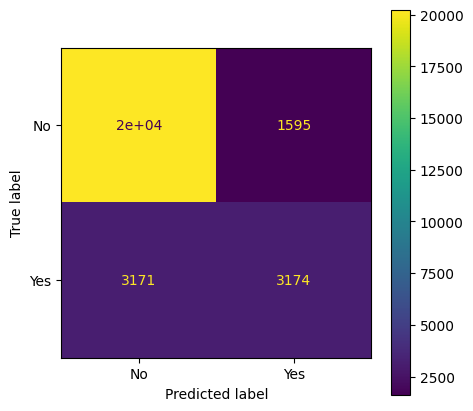

In [46]:
plt.rcParams['figure.figsize']=(5, 5)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=knn.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
display.plot()
plt.show()

In [47]:
y_train_pred = knn.predict(X_train)

In [48]:
print('Train accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))

Train accuracy score: 0.9034


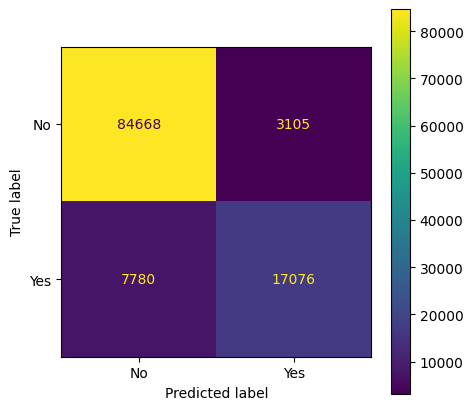

In [49]:
plt.rcParams['figure.figsize']=(5, 5)
conf_matrix_train = confusion_matrix(y_true=y_train, y_pred=y_train_pred, labels=knn.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=knn.classes_)
display.plot()
plt.show()